# LGBM & XGBM
Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

df = pd.concat([train,test],ignore_index= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

df.shape

## Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [5]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

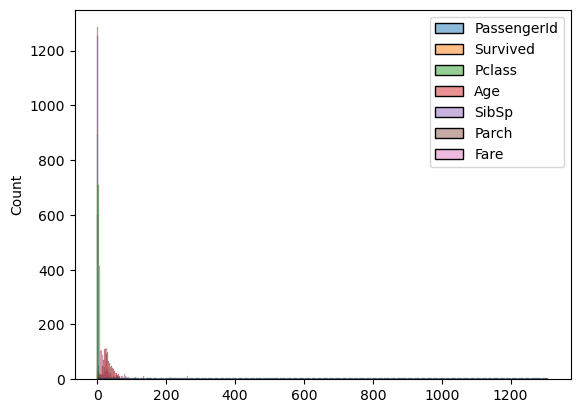

In [6]:
sns.histplot(df)
plt.show()

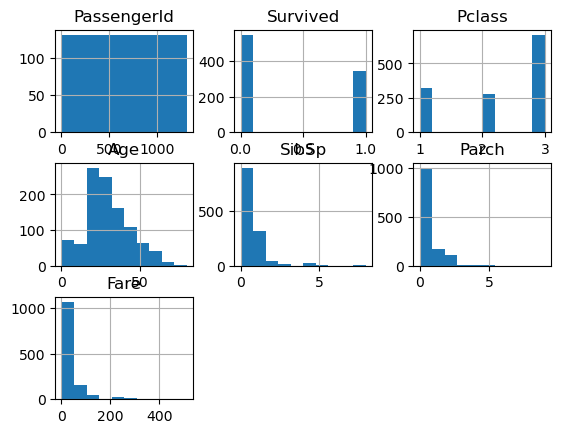

In [7]:
df.hist()
plt.show()

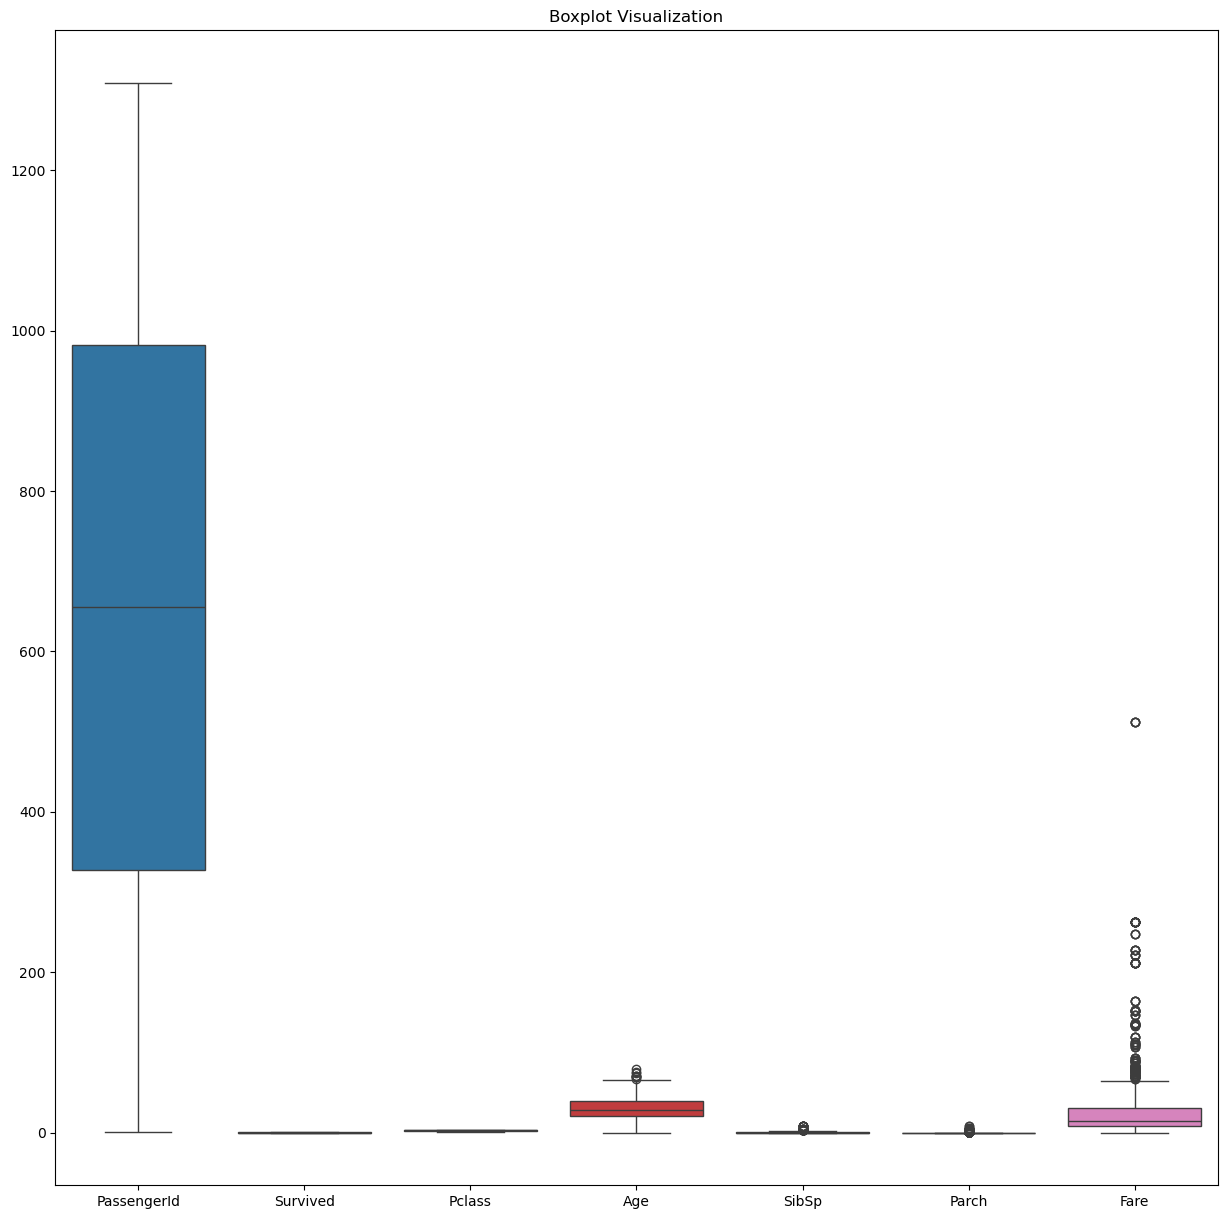

In [8]:
numaric_cols = df.select_dtypes(include = ['int64','float64'])

plt.figure(figsize= (15,15))
sns.boxplot(data = numaric_cols)
plt.title("Boxplot Visualization")
plt.show()

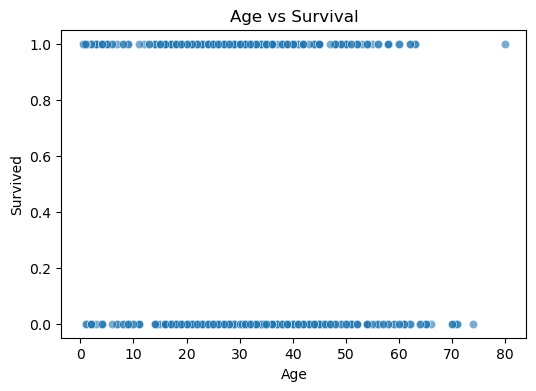

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Survived", data=df, alpha=0.6)
plt.title("Age vs Survival")
plt.show()

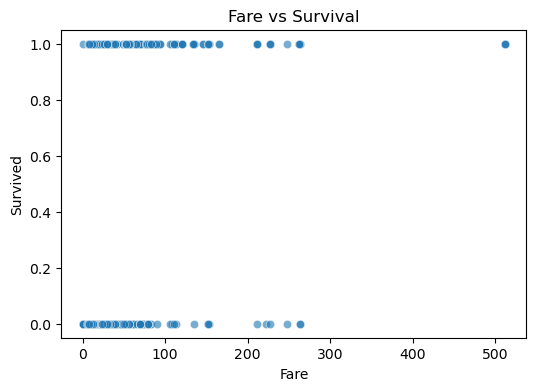

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Fare", y="Survived", data=df, alpha=0.6)
plt.title("Fare vs Survival")
plt.show()

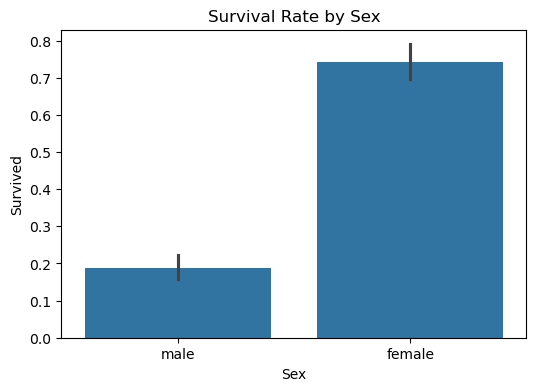

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()


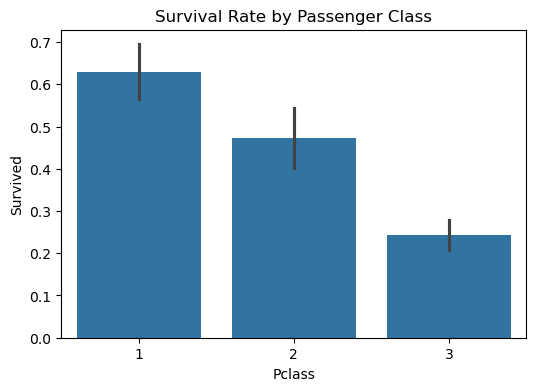

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


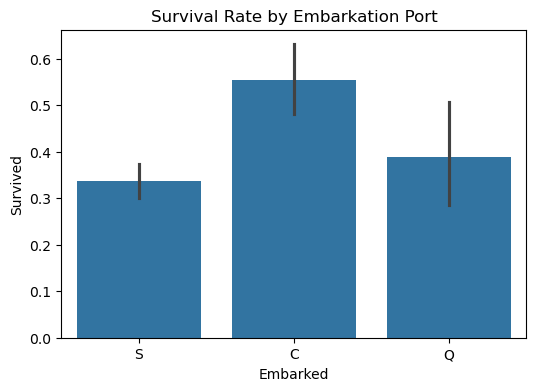

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Survival Rate by Embarkation Port")
plt.show()

## Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.


In [14]:
for col, missing in df.isna().sum().items():
    if missing >= 0:  
        print(f"{col}: {round(missing/len(df)*100, 2)}% missing")

PassengerId: 0.0% missing
Survived: 31.93% missing
Pclass: 0.0% missing
Name: 0.0% missing
Sex: 0.0% missing
Age: 20.09% missing
SibSp: 0.0% missing
Parch: 0.0% missing
Ticket: 0.0% missing
Fare: 0.08% missing
Cabin: 77.46% missing
Embarked: 0.15% missing


In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])




In [17]:
df= df.drop('Cabin',axis=1)

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [19]:
for col, missing in df.isna().sum().items():
    if missing >= 0:  
        print(f"{col}: {round(missing/len(df)*100, 2)}% missing")

PassengerId: 0.0% missing
Survived: 31.93% missing
Pclass: 0.0% missing
Name: 0.0% missing
Sex: 0.0% missing
Age: 0.0% missing
SibSp: 0.0% missing
Parch: 0.0% missing
Ticket: 0.0% missing
Fare: 0.0% missing
Embarked: 0.0% missing


In [20]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [21]:
obj_cols = df.select_dtypes(include='object').columns

for col in obj_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Name: 1307 unique values
Sex: 2 unique values
Ticket: 929 unique values
Embarked: 3 unique values


In [22]:
# we wil drop the Name  and ticket columns as it contains many unique values and it will affect further
df = df.drop(['Name', 'Ticket'], axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df = pd.get_dummies(df,columns=['Embarked'],drop_first= True)

In [24]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,7.2500,False,True
1,2,1.0,1,0,38.0,1,0,71.2833,False,False
2,3,1.0,3,0,26.0,0,0,7.9250,False,True
3,4,1.0,1,0,35.0,1,0,53.1000,False,True
4,5,0.0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,28.0,0,0,8.0500,False,True
1305,1306,NaN,1,0,39.0,0,0,108.9000,False,False
1306,1307,NaN,3,1,38.5,0,0,7.2500,False,True
1307,1308,NaN,3,1,28.0,0,0,8.0500,False,True


In [43]:
# Separate train and test based on Survived presence
train_processed = df[df['Survived'].notnull()]
test_processed  = df[df['Survived'].isnull()]

X_train = train_processed.drop('Survived', axis=1)
y_train = train_processed['Survived']

X_test = test_processed.drop('Survived', axis=1)


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [52]:
from sklearn.model_selection import train_test_split

X_tr,X_te,y_tr,y_te= train_test_split(X_train,y_train, test_size = 0.2, random_state = 42)

In [31]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00


In [54]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=40)
lgbm.fit(X_tr, y_tr)
y_pred_lgbm = lgbm.predict(X_te)




[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [55]:
print("Accuracy:", accuracy_score(y_te, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_te, y_pred_lgbm))


Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       105
         1.0       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [37]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state= 42)
xgb.fit(X_tr,y_tr)
y_pred_xgb= xgb.predict(X_te)



In [57]:
print("accuracy:", accuracy_score(y_te, y_pred_xgb))
print("\nClassification Report :\n", classification_report(y_te,y_pred_xgb))

accuracy: 0.7932960893854749

Classification Report :
               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       105
         1.0       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV

scores = cross_val_score(LGBMClassifier(random_state=42),X_tr,y_tr, cv= 5, scoring= 'accuracy')
print("CV accuracy:",scores.mean())


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [65]:
scores

array([0.82517483, 0.81118881, 0.79577465, 0.78873239, 0.81690141])

In [71]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.05,0.1]
}
grid = GridSearchCV(lgbm, param_grid, cv= 5, scoring= 'accuracy')
grid.fit(X_tr,y_tr)


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=40),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [63]:
print(" Best parameters", grid.best_params_)
print(" best cv accuracy", grid.best_score_) 

 Best parameters {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
 best cv accuracy 0.8328671328671329


## Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


## Answer

When we compare the performance of LightGBM and XGBoost, both models perform quite well, but there are small differences. LightGBM has a slightly higher accuracy of around 79.9% compared to XGBoost’s 79.3%. Looking at precision and recall, LightGBM is better at identifying survivors (class 1) with higher precision, while XGBoost is slightly better at recalling survivors. For non-survivors (class 0), LightGBM recalls slightly better, and XGBoost has a small advantage in precision. Overall, the F1-scores of both models are very close, with LightGBM having a small edge. So, both models work fine, but LightGBM seems to perform just a little better overall.

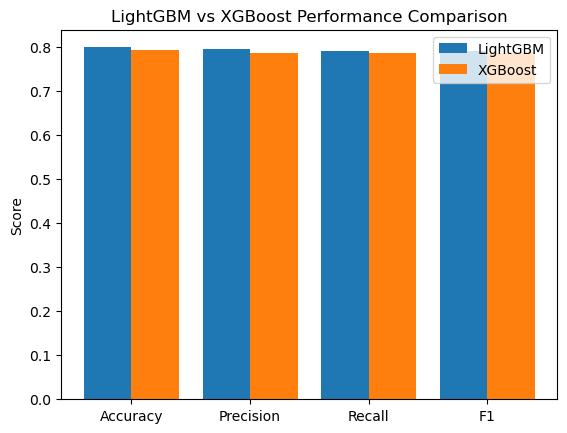

In [69]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
lgbm_scores = [0.7989, (0.81+0.78)/2, (0.86+0.72)/2, (0.83+0.75)/2]
xgb_scores  = [0.7933, (0.82+0.75)/2, (0.83+0.74)/2, (0.82+0.75)/2]

x = range(len(metrics))
plt.bar(x, lgbm_scores, width=0.4, label='LightGBM', align='center')
plt.bar([i + 0.4 for i in x], xgb_scores, width=0.4, label='XGBoost', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel("Score")
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.legend()
plt.show()

## Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.


## Submission Explanation:

Data Loading and Preprocessing:

Loaded the Titanic train and test datasets and combined them for preprocessing.

Dropped columns with too many missing or unique values (Cabin, Name, Ticket).

Handled missing values in Age and Embarked.

Encoded categorical variables (Sex and Embarked) using one-hot encoding.

Splitting Data:

Split the preprocessed data into training and validation sets using train_test_split.

Separated features (X) and target (Survived).

Model Building and Evaluation:

Built LightGBM and XGBoost classifiers.

Trained the models on the training set and predicted on the validation set.

Evaluated performance using accuracy, precision, recall, and F1-score.

Also performed cross-validation to check model consistency and used GridSearchCV for hyperparameter tuning.

Comparative Analysis:

Compared metrics: LightGBM had slightly higher overall accuracy (~79.9%) than XGBoost (~79.3%).

LightGBM was slightly better at identifying non-survivors, while XGBoost had a small edge in recalling survivors.

Both models had similar F1-scores.

Hyperparameter tuning improved LightGBM’s CV accuracy to ~83.3%, showing that fine-tuning can enhance model performance.

Visualization:

Created a bar chart comparing accuracy, precision, recall, and F1-score of both models.

The chart visually highlights the small differences and overall better performance of LightGBM.

Conclusion:

Both LightGBM and XGBoost are effective for predicting survival on the Titanic dataset.

LightGBM slightly outperforms XGBoost overall, but XGBoost can be slightly better for detecting survivors.